#### Boston House Prices dataset 

The boston dataset was first published in 1978 in a paper [Hedonic Housing Prices and the Demand for Clean Air ](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf) by Harrison and Rubenfield.  506 entries represent aggregated data about 14 features for homes in Boston and capture the Crime rate (CRIM), number of Rooms(RM), age(AGE) of owners and more. This dataset is widely used in many machine learning papers that address regression problems.

#### Aims of this notebook:

1. Use **descriptive statistics** and plots to describe the Boston House Prices dataset. 
2. Use **inferential statistics** to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your findings within the notebook. 
3. Use **keras** to create a neural network that can predict the median house price based on the other variables in the dataset.

### Libraries used in this project

In [1]:
import numpy as np
import pandas as pd
# plots
import seaborn as sns
import matplotlib.pyplot as plt
# for creating folder for plots
import os
from random import random
# statistical analysis
import researchpy as rp
import statsmodels.api as sm
#for interactive widgets for charts
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# machine learning
import keras as kr
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
# importing the boston housing dataset
from sklearn.datasets import load_boston
boston_df = load_boston()

## Exploring the data

In [3]:
# print the keys in the dataset
print(boston_df.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


To learn more about this dataset you can print the description

In [4]:
# DESC should tell us what the data is about
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# the feature name contain the columns of the dataset
print(boston_df.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


From inspecting the boston_df.filename, we can see that feature_names should be the columns and boston_df.data should be the rows

In [6]:
# create a new dataset called Boston using the feature_names as the columns
boston = pd.DataFrame(boston_df.data, columns=boston_df.feature_names)
# We are missing one column (MEDV). According to DESCR, Median Value (attribute 14) is usually the target.
boston['MEDV'] = boston_df.target

# Median value of owner-occupied homes in $1000's 
boston['MEDV'] = (boston['MEDV']*1000)

# glance at the data
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0


#### Date cleaning
This is important for the machine learning part of the project
- check for null values, df.isnull().sum(). Luckily there is no null values in the dataset
- check for duplicates

There are 16 duplicates for MEDV of 50000.0. We need to remove them as they will throw off the predictions later in the project.

In [7]:
boston = (boston[boston.MEDV != 50000.0])

## Part 1. Descriptive Statistics
Use **descriptive statistics** and plots to describe the Boston House Prices dataset.

Here we can quickly see the mean, standard deviation, min, max and various percentiles for the dataset.

In [8]:
# describe() gives us a quick overview of the dataset
summary = boston.describe()
summary = summary.transpose()
summary.round(2)

,count,mean,std,min,25%,50%,75%,max
CRIM,490.0,3.64,8.72,0.01,0.08,0.25,3.65,88.98
ZN,490.0,11.11,22.84,0.00,0.00,0.00,12.50,100.00
INDUS,490.0,11.11,6.82,0.74,5.19,9.69,18.10,27.74
CHAS,490.0,0.06,0.24,0.00,0.00,0.00,0.00,1.00
NOX,490.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,490.0,6.25,0.65,3.56,5.88,6.18,6.58,8.78
AGE,490.0,68.28,28.16,2.90,44.55,76.80,93.88,100.00
DIS,490.0,3.83,2.11,1.14,2.11,3.28,5.21,12.13
RAD,490.0,9.51,8.69,1.00,4.00,5.00,24.00,24.00
TAX,490.0,408.00,168.07,187.00,280.25,330.00,666.00,711.00


In [9]:
prices = boston['MEDV']
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print( "Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:
Minimum price: $5,000.00
Maximum price: $48,800.00
Mean price: $21,635.92
Median price $20,900.00
Standard deviation of prices: $7,857.27


While researching this topic, I read this blog post:[Analysis of the Boston Housing Prices Dataset](https://rpubs.com/joelrudinas03/BostonHousingPrices) by Joel Jr Ffc Rudinas in R which uses a mixed correlation matrix to quickly investigate relationships between the variables. After looking for ways to do this in Python, I settled on the correlation heatmap using Seaborn:

- **Positive Correlation**: both variables change in the same direction (light color).

- **Neutral Correlation**: No relationship in the change of the variables.

- **Negative Correlation**: variables change in opposite directions (dark color).

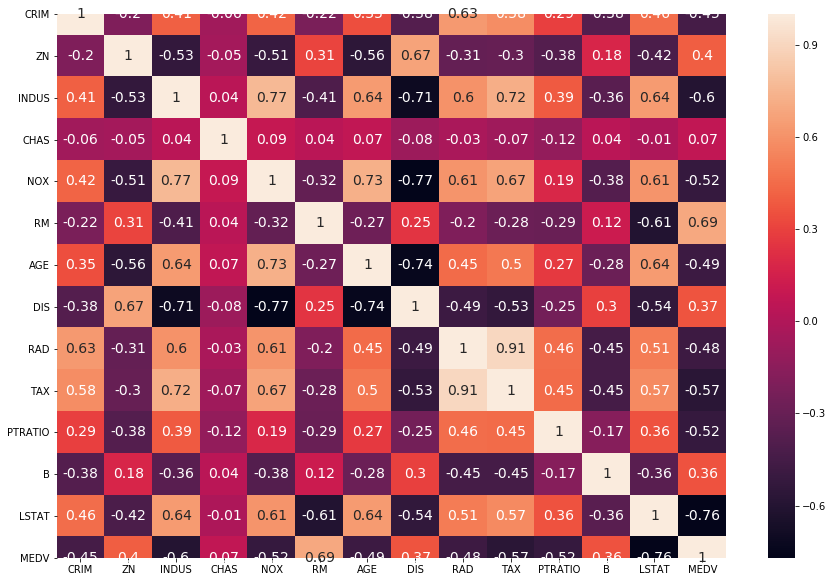

In [10]:
# using a correlation heatmap, we can quickly get a sense for any relationships between the dataset. The darkest and lightest squares show variables which have a strong relationship. 
plt.figure(figsize=(15, 10))
cmap=sns.cubehelix_palette(50, light=0.95, dark=0.15)

# rounding to 2 decimal places and increasing the font size
sns.heatmap(data=boston.corr().round(2), annot=True, annot_kws={"size":14})
#plt.tight_layout()

#save the plot
plt.savefig('plots/bostondatasetcorrelation.png')

# show plot
plt.show()


From the correlation heatmap

- We can see a positive correlation between MEDV and RM at 0.69. When the average number of rooms increase the price of the house also increases.
- Negative correlation between MEDV and LSTAT (% lower status of the population): -0.76
- Negative correlation between MEDV and PTRatio (pupil-teacher ratio by town): (-0.52)
- Negative correlation between MEDV and INDUS (proportion of non-retail business acres per town) (-0.6)

Let's plot these to see more details:

In [11]:
if not os.path.exists("plots/box"):
    os.makedirs("plots/box")
    
@interact

def box_plt(datalist = list(boston.columns)):
    for i, value in enumerate(boston):
        sns.boxplot(boston[datalist], orient="v")
        plt.savefig("plots/box/box_" + str(i) + ".png")
       

interactive(children=(Dropdown(description='datalist', options=('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'A…

In [12]:
#from __future__ import print_function
#from ipywidgets import interact, interactive, fixed
#import ipywidgets as widgets

In [13]:
sns.set(style="whitegrid",  rc={'figure.figsize':(11.7,8.27)})

df= boston[['RM','LSTAT','CRIM','INDUS','PTRATIO', 'MEDV']]

#create a folder to add the plots to
if not os.path.exists("plots/linearregression/"):
    os.makedirs("plots/linearregression/")
    
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns)):
    
    for i, col in enumerate(df):
       sns.regplot(x=x, y='MEDV', data=df)
       plt.savefig("plots/linearregression/linearreg_" + str(i) + ".png")
   


interactive(children=(Dropdown(description='x', options=('RM', 'LSTAT', 'CRIM', 'INDUS', 'PTRATIO', 'MEDV'), v…

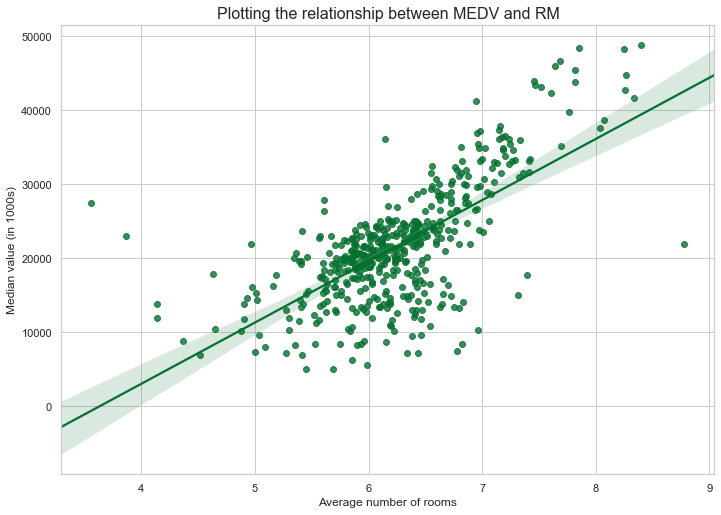

In [14]:
sns.set(style="whitegrid", palette="BuGn_r", rc={'figure.figsize':(11.7,8.27)})

#sns.scatterplot(x='RM', y='MEDV', data=boston)
sns.regplot(x='RM', y='MEDV', data=boston)
title="Plotting the relationship between MEDV and RM"

# Set x-axis label
plt.xlabel('Average number of rooms')
# Set y-axis label
plt.ylabel('Median value (in 1000s)')

# increasing font size
plt.title(title, fontsize=16)

#save the plot
plt.savefig('plots/medvvrmrelationship.png')

# Show the plot
plt.show()

From the correlation heatmap, we can we a negative correlation between MEDV and LSTAT at -0.74. When the % of lower status of the populations increases the value of houses decrease.

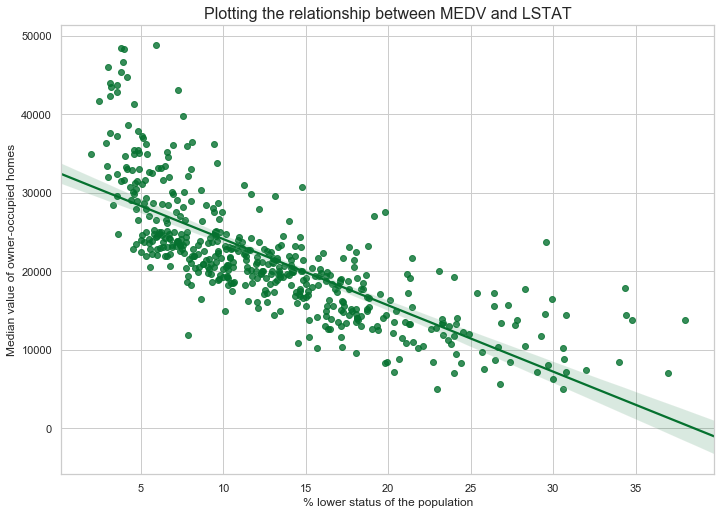

In [15]:
sns.set(style="whitegrid", palette="BuGn_r", rc={'figure.figsize':(11.7,8.27)})


sns.regplot(x='LSTAT', y='MEDV', data=boston)
title="Plotting the relationship between MEDV and LSTAT"

# increasing font size
plt.title(title, fontsize=16)

# Set x-axis label
plt.xlabel('% lower status of the population')
# Set y-axis label
plt.ylabel('Median value of owner-occupied homes')

#save the plot
plt.savefig('plots/medvandlstatrelationship.png')

# Show the plot
plt.show()

# Part 2. Inferential Statistics

Use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. 

In [16]:
# Gettin summary statistics of MEDV for the population
rp.summary_cont(boston['MEDV'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,MEDV,490.0,21635.918367,7865.301063,355.318083,20937.779775,22334.05696


In [17]:
# let's look at the data grouped by whether they bound the River or otherwise.
rp.summary_cont(boston['MEDV'].groupby(boston['CHAS']))

,N,Mean,SD,SE,95% Conf.,Interval
CHAS,,,,,,
0.0,461,21488.503254,7898.848164,367.886036,20766.663292,22210.343215
1.0,29,23979.310345,7024.161328,1304.354013,21377.524579,26581.096111


From the above summary we can see that the houses bound the river have a higher mean MEDV. Let's visualise this with a boxplot.

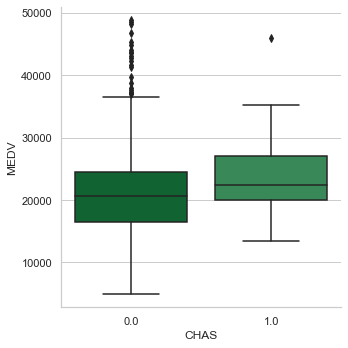

In [18]:
sns.catplot(x='CHAS', y='MEDV', kind="box", data=boston)

#save the plot
plt.savefig('plots/boxplot.png')

In [19]:
riverhouse_df = boston[boston['CHAS']==1.0]
other_df = boston[boston['CHAS']==0.0]

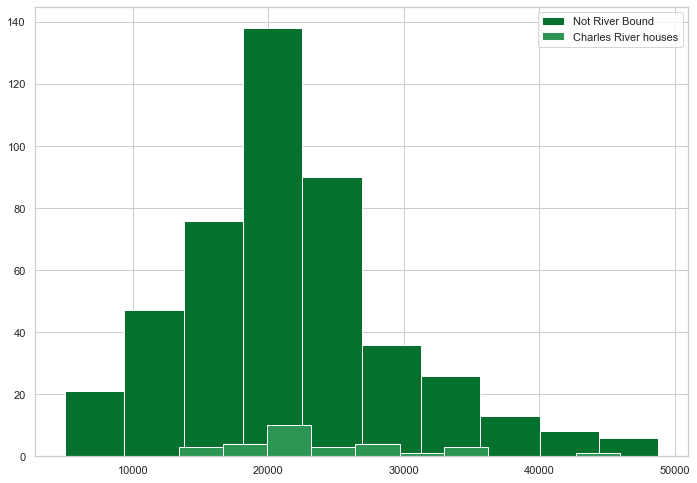

In [20]:
import matplotlib.pyplot as plt
plt.hist(other_df['MEDV'], label='Not River Bound')
plt.hist(riverhouse_df['MEDV'], label='Charles River houses')

plt.legend()

plt.savefig('plots/hist.png')

plt.show()

In [21]:
#add info about the One way Anova

In [22]:
#oneway anova
import scipy.stats as stats
stats.f_oneway(other_df['MEDV'], riverhouse_df['MEDV'])

F_onewayResult(statistic=2.7459981221672622, pvalue=0.098140893200901)

Check which dataset has the highest mean the population or the sample?

In [23]:
Mean1 = other_df.MEDV.mean()
Mean2 = riverhouse_df.MEDV.mean()
print("Mean price Boston house dataset (population):", Mean1)
print("mean price Charles river House (sample):", Mean2)

Mean price Boston house dataset (population): 21488.503253796094
mean price Charles river House (sample): 23979.310344827587


### Z-test

Comparing the mean of the house not by the river (22.09) and river bound (28.44) looks much bigger however we can use a Z-TEST to check if it is statistically significant. We use use a z-test when the sample is greater than 30 and riverhouse_df has 35.

In [24]:
# Convert into two arrays
X2 = np.array(other_df.MEDV)
Y2 = np.array(riverhouse_df.MEDV)

In [25]:
# import the package for performing Z Test
from statsmodels.stats.weightstats import ztest

In [26]:
ztest(Y2,x2=None,value=Mean1)

(1.9096097115736, 0.056183483767629605)

p value is 0.0014868133390002274 which is lower than 0.05 and therefore is statistically significant.

# 3. Predict

Use keras to create a neural network that can predict the median house price based on the other variables in the dataset.

The target variable, 'MEDV', will be the variable we seek to predict.

https://towardsdatascience.com/how-do-we-train-neural-networks-edd985562b73

https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

https://tensorflow.rstudio.com/keras/articles/tutorial_basic_regression.html
https://cran.r-project.org/web/packages/keras/vignettes/getting_started.html

In [27]:
# first neural network with keras tutorial
#import libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 13 for the 13 input variables.

In [28]:
#input features (X) 
#inputs = boston.iloc[:, 0:13]
# only take the features that have a strong correlation of MEDV
features = boston[['RM', 'LSTAT', 'PTRATIO']]
#train_X = boston.drop(columns=['MEDV'])
# What we want to predict
#train_y = boston.iloc[:,13]
prices = boston[['MEDV']]

In [29]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [30]:
# should be divided in to 80% train, 20% test
print(features.shape[0])
print("Train:", float(X_train.shape[0]) / float(features.shape[0]))
print("Test:", float(X_test.shape[0]) / float(features.shape[0]))

490
Train: 0.8
Test: 0.2


In [31]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.
# input dim = number of inputs
# softmax, relu

#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers

# input dim = number of inputs
m.add(kr.layers.Dense(10, activation='relu', input_shape=(n_cols,)))
m.add(kr.layers.Dense(30, activation="relu"))
m.add(kr.layers.Dense(10, activation="relu"))
#how many outputs?
m.add(kr.layers.Dense(1))


# Compile the model.  adam, sgd, RMSprop
#compile model using mse as a measure of model performance
m.compile(optimizer='adam', loss='mean_squared_error')
      
# Train the model.
m.fit(train_X, train_y, epochs=2000, batch_size=20)

print(m.summary())
      


build_model <- function() {
  
  model <- keras_model_sequential() %>%
    layer_dense(units = 64, activation = "relu",
                input_shape = dim(train_data)[2]) %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dense(units = 1)
  
  model %>% compile(
    loss = "mse",
    optimizer = optimizer_rmsprop(),
    metrics = list("mean_absolute_error")
  )
  
  model
}

model <- build_model()
model %>% summary()

In [50]:

# Create a new neural network.
m = kr.models.Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers

# input dim = number of inputs
m.add(kr.layers.Dense(64, activation='relu', input_shape=(n_cols,)))
m.add(kr.layers.Dense(64, activation="relu"))
m.add(kr.layers.Dense(32, activation="relu"))
#how many outputs?
m.add(kr.layers.Dense(1))


#compile model using mse as a measure of model performance
#m.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['accuracy'])
m.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
# Train the model.
hist = m.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=1000, batch_size=10, verbose=1)

score = m.evaluate(X_test, y_test, verbose = 0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
print(m.summary())

Train on 392 samples, validate on 98 samples
Epoch 1/1000
392/392 [==============================] - 1s 2ms/step - loss: 530339128.6531 - accuracy: 0.0000e+00 - val_loss: 521549852.7347 - val_accuracy: 0.0000e+00
Epoch 2/1000
392/392 [==============================] - 0s 290us/step - loss: 523870527.1837 - accuracy: 0.0000e+00 - val_loss: 507705227.7551 - val_accuracy: 0.0000e+00
Epoch 3/1000
392/392 [==============================] - 0s 287us/step - loss: 493188930.6939 - accuracy: 0.0000e+00 - val_loss: 452582370.6122 - val_accuracy: 0.0000e+00
Epoch 4/1000
392/392 [==============================] - 0s 290us/step - loss: 402312994.6122 - accuracy: 0.0000e+00 - val_loss: 321015691.4286 - val_accuracy: 0.0000e+00
Epoch 5/1000
392/392 [==============================] - 0s 306us/step - loss: 248885586.7755 - accuracy: 0.0000e+00 - val_loss: 163868774.5306 - val_accuracy: 0.0000e+00
Epoch 6/1000
392/392 [==============================] - 0s 293us/step - loss: 140743662.7959 - accuracy: 0.

392/392 [==============================] - 0s 290us/step - loss: 28333250.6224 - accuracy: 0.0000e+00 - val_loss: 25254197.3061 - val_accuracy: 0.0000e+00
Epoch 50/1000
392/392 [==============================] - 0s 269us/step - loss: 27833212.2015 - accuracy: 0.0000e+00 - val_loss: 24977799.3265 - val_accuracy: 0.0000e+00
Epoch 51/1000
392/392 [==============================] - 0s 277us/step - loss: 27595094.9235 - accuracy: 0.0000e+00 - val_loss: 25093504.7857 - val_accuracy: 0.0000e+00
Epoch 52/1000
392/392 [==============================] - 0s 277us/step - loss: 27366334.9107 - accuracy: 0.0000e+00 - val_loss: 24594954.1633 - val_accuracy: 0.0000e+00
Epoch 53/1000
392/392 [==============================] - 0s 281us/step - loss: 27183459.4592 - accuracy: 0.0000e+00 - val_loss: 24568509.4796 - val_accuracy: 0.0000e+00
Epoch 54/1000
392/392 [==============================] - 0s 280us/step - loss: 27012768.8571 - accuracy: 0.0000e+00 - val_loss: 24190024.0000 - val_accuracy: 0.0000e+00


392/392 [==============================] - 0s 279us/step - loss: 20041692.2851 - accuracy: 0.0000e+00 - val_loss: 17361248.3367 - val_accuracy: 0.0000e+00
Epoch 98/1000
392/392 [==============================] - 0s 273us/step - loss: 19813430.1276 - accuracy: 0.0000e+00 - val_loss: 17275663.4184 - val_accuracy: 0.0000e+00
Epoch 99/1000
392/392 [==============================] - 0s 282us/step - loss: 19666024.9260 - accuracy: 0.0000e+00 - val_loss: 16992479.3367 - val_accuracy: 0.0000e+00
Epoch 100/1000
392/392 [==============================] - 0s 283us/step - loss: 19607333.7066 - accuracy: 0.0000e+00 - val_loss: 16988249.5204 - val_accuracy: 0.0000e+00
Epoch 101/1000
392/392 [==============================] - 0s 276us/step - loss: 19423802.3112 - accuracy: 0.0026 - val_loss: 17105649.3622 - val_accuracy: 0.0000e+00
Epoch 102/1000
392/392 [==============================] - 0s 283us/step - loss: 19416469.0740 - accuracy: 0.0000e+00 - val_loss: 16819054.9082 - val_accuracy: 0.0000e+00
E

392/392 [==============================] - 0s 282us/step - loss: 15644374.8546 - accuracy: 0.0000e+00 - val_loss: 12758805.8546 - val_accuracy: 0.0000e+00
Epoch 146/1000
392/392 [==============================] - 0s 279us/step - loss: 15756986.4056 - accuracy: 0.0000e+00 - val_loss: 13327917.4337 - val_accuracy: 0.0000e+00
Epoch 147/1000
392/392 [==============================] - 0s 278us/step - loss: 15551091.8202 - accuracy: 0.0000e+00 - val_loss: 12679572.4515 - val_accuracy: 0.0000e+00
Epoch 148/1000
392/392 [==============================] - 0s 277us/step - loss: 15431776.3546 - accuracy: 0.0000e+00 - val_loss: 12544039.4235 - val_accuracy: 0.0000e+00
Epoch 149/1000
392/392 [==============================] - 0s 280us/step - loss: 15451913.2819 - accuracy: 0.0000e+00 - val_loss: 12558573.9133 - val_accuracy: 0.0000e+00
Epoch 150/1000
392/392 [==============================] - 0s 284us/step - loss: 15366505.4748 - accuracy: 0.0000e+00 - val_loss: 12453413.7092 - val_accuracy: 0.0000

392/392 [==============================] - 0s 298us/step - loss: 14584618.7844 - accuracy: 0.0000e+00 - val_loss: 12179689.5102 - val_accuracy: 0.0000e+00
Epoch 194/1000
392/392 [==============================] - 0s 290us/step - loss: 14749284.9962 - accuracy: 0.0000e+00 - val_loss: 11577579.5663 - val_accuracy: 0.0000e+00
Epoch 195/1000
392/392 [==============================] - 0s 289us/step - loss: 14570664.1913 - accuracy: 0.0000e+00 - val_loss: 12493275.7117 - val_accuracy: 0.0000e+00
Epoch 196/1000
392/392 [==============================] - 0s 285us/step - loss: 14598719.7551 - accuracy: 0.0000e+00 - val_loss: 11537416.8265 - val_accuracy: 0.0000e+00
Epoch 197/1000
392/392 [==============================] - 0s 284us/step - loss: 14507384.0918 - accuracy: 0.0026 - val_loss: 11928976.9949 - val_accuracy: 0.0000e+00
Epoch 198/1000
392/392 [==============================] - 0s 286us/step - loss: 14635571.3712 - accuracy: 0.0000e+00 - val_loss: 11767170.2857 - val_accuracy: 0.0000e+00

392/392 [==============================] - 0s 291us/step - loss: 14458345.5976 - accuracy: 0.0000e+00 - val_loss: 11445885.9031 - val_accuracy: 0.0000e+00
Epoch 242/1000
392/392 [==============================] - 0s 276us/step - loss: 14374384.2219 - accuracy: 0.0000e+00 - val_loss: 11612291.7270 - val_accuracy: 0.0000e+00
Epoch 243/1000
392/392 [==============================] - 0s 277us/step - loss: 14578598.9894 - accuracy: 0.0000e+00 - val_loss: 11713023.8163 - val_accuracy: 0.0000e+00
Epoch 244/1000
392/392 [==============================] - 0s 304us/step - loss: 14402191.3291 - accuracy: 0.0000e+00 - val_loss: 11379167.0714 - val_accuracy: 0.0000e+00
Epoch 245/1000
392/392 [==============================] - 0s 295us/step - loss: 14387390.1276 - accuracy: 0.0000e+00 - val_loss: 11540725.3801 - val_accuracy: 0.0000e+00
Epoch 246/1000
392/392 [==============================] - 0s 282us/step - loss: 14416687.1199 - accuracy: 0.0000e+00 - val_loss: 11757716.3316 - val_accuracy: 0.0000

392/392 [==============================] - 0s 279us/step - loss: 14228679.1161 - accuracy: 0.0000e+00 - val_loss: 11438409.8495 - val_accuracy: 0.0000e+00
Epoch 290/1000
392/392 [==============================] - 0s 274us/step - loss: 14267690.9031 - accuracy: 0.0000e+00 - val_loss: 11849248.1454 - val_accuracy: 0.0000e+00
Epoch 291/1000
392/392 [==============================] - 0s 281us/step - loss: 14460293.4617 - accuracy: 0.0026 - val_loss: 11430716.1709 - val_accuracy: 0.0000e+00
Epoch 292/1000
392/392 [==============================] - 0s 292us/step - loss: 14416040.6811 - accuracy: 0.0000e+00 - val_loss: 11574884.2934 - val_accuracy: 0.0000e+00
Epoch 293/1000
392/392 [==============================] - 0s 288us/step - loss: 14465803.7449 - accuracy: 0.0000e+00 - val_loss: 11411048.4617 - val_accuracy: 0.0000e+00
Epoch 294/1000
392/392 [==============================] - 0s 286us/step - loss: 14247945.8444 - accuracy: 0.0000e+00 - val_loss: 11300191.0153 - val_accuracy: 0.0000e+00

392/392 [==============================] - 0s 291us/step - loss: 14036980.8444 - accuracy: 0.0000e+00 - val_loss: 12156580.8622 - val_accuracy: 0.0000e+00
Epoch 338/1000
392/392 [==============================] - 0s 283us/step - loss: 14278402.1747 - accuracy: 0.0000e+00 - val_loss: 12105678.7526 - val_accuracy: 0.0000e+00
Epoch 339/1000
392/392 [==============================] - 0s 284us/step - loss: 14315923.8010 - accuracy: 0.0000e+00 - val_loss: 12551696.5510 - val_accuracy: 0.0000e+00
Epoch 340/1000
392/392 [==============================] - 0s 287us/step - loss: 14162886.9107 - accuracy: 0.0000e+00 - val_loss: 11423894.6148 - val_accuracy: 0.0000e+00
Epoch 341/1000
392/392 [==============================] - 0s 285us/step - loss: 14191167.0702 - accuracy: 0.0000e+00 - val_loss: 11419564.8316 - val_accuracy: 0.0000e+00
Epoch 342/1000
392/392 [==============================] - 0s 285us/step - loss: 14153370.6122 - accuracy: 0.0000e+00 - val_loss: 11767800.7832 - val_accuracy: 0.0000

392/392 [==============================] - 0s 290us/step - loss: 14411492.4698 - accuracy: 0.0000e+00 - val_loss: 11224520.6301 - val_accuracy: 0.0000e+00
Epoch 386/1000
392/392 [==============================] - 0s 279us/step - loss: 14063129.5587 - accuracy: 0.0000e+00 - val_loss: 11200675.6990 - val_accuracy: 0.0000e+00
Epoch 387/1000
392/392 [==============================] - 0s 288us/step - loss: 14053233.3406 - accuracy: 0.0000e+00 - val_loss: 11613244.9745 - val_accuracy: 0.0000e+00
Epoch 388/1000
392/392 [==============================] - 0s 286us/step - loss: 13911639.1760 - accuracy: 0.0000e+00 - val_loss: 11205108.1378 - val_accuracy: 0.0000e+00
Epoch 389/1000
392/392 [==============================] - 0s 284us/step - loss: 14434751.2092 - accuracy: 0.0000e+00 - val_loss: 11975133.1378 - val_accuracy: 0.0000e+00
Epoch 390/1000
392/392 [==============================] - 0s 283us/step - loss: 14266753.2430 - accuracy: 0.0000e+00 - val_loss: 11229189.5816 - val_accuracy: 0.0000

392/392 [==============================] - 0s 293us/step - loss: 13977899.9018 - accuracy: 0.0000e+00 - val_loss: 11224242.0969 - val_accuracy: 0.0000e+00
Epoch 434/1000
392/392 [==============================] - 0s 282us/step - loss: 14040083.4592 - accuracy: 0.0000e+00 - val_loss: 11596207.4082 - val_accuracy: 0.0000e+00
Epoch 435/1000
392/392 [==============================] - 0s 285us/step - loss: 13960988.9401 - accuracy: 0.0000e+00 - val_loss: 11265911.5740 - val_accuracy: 0.0000e+00
Epoch 436/1000
392/392 [==============================] - 0s 287us/step - loss: 13993888.3323 - accuracy: 0.0026 - val_loss: 11113396.2577 - val_accuracy: 0.0000e+00
Epoch 437/1000
392/392 [==============================] - 0s 279us/step - loss: 13950088.9235 - accuracy: 0.0000e+00 - val_loss: 11080845.8342 - val_accuracy: 0.0000e+00
Epoch 438/1000
392/392 [==============================] - 0s 279us/step - loss: 14095988.8304 - accuracy: 0.0000e+00 - val_loss: 11168941.0740 - val_accuracy: 0.0000e+00

392/392 [==============================] - 0s 298us/step - loss: 13893771.6429 - accuracy: 0.0000e+00 - val_loss: 11302641.8929 - val_accuracy: 0.0000e+00
Epoch 482/1000
392/392 [==============================] - 0s 273us/step - loss: 13870325.9592 - accuracy: 0.0000e+00 - val_loss: 11149092.0842 - val_accuracy: 0.0102
Epoch 483/1000
392/392 [==============================] - 0s 276us/step - loss: 14175434.6186 - accuracy: 0.0000e+00 - val_loss: 11242023.9745 - val_accuracy: 0.0000e+00
Epoch 484/1000
392/392 [==============================] - 0s 273us/step - loss: 13948129.4298 - accuracy: 0.0026 - val_loss: 11295262.6811 - val_accuracy: 0.0000e+00
Epoch 485/1000
392/392 [==============================] - 0s 270us/step - loss: 13968549.6505 - accuracy: 0.0000e+00 - val_loss: 11250670.8418 - val_accuracy: 0.0000e+00
Epoch 486/1000
392/392 [==============================] - 0s 279us/step - loss: 13886344.9764 - accuracy: 0.0000e+00 - val_loss: 11147323.9133 - val_accuracy: 0.0000e+00
Epo

392/392 [==============================] - 0s 291us/step - loss: 13873331.6556 - accuracy: 0.0000e+00 - val_loss: 11261430.4643 - val_accuracy: 0.0000e+00
Epoch 530/1000
392/392 [==============================] - 0s 279us/step - loss: 13773925.7181 - accuracy: 0.0000e+00 - val_loss: 11369742.0357 - val_accuracy: 0.0000e+00
Epoch 531/1000
392/392 [==============================] - 0s 285us/step - loss: 13780296.8852 - accuracy: 0.0000e+00 - val_loss: 11122812.9745 - val_accuracy: 0.0000e+00
Epoch 532/1000
392/392 [==============================] - 0s 277us/step - loss: 13817027.1786 - accuracy: 0.0000e+00 - val_loss: 11381555.8010 - val_accuracy: 0.0000e+00
Epoch 533/1000
392/392 [==============================] - 0s 283us/step - loss: 13716599.9133 - accuracy: 0.0000e+00 - val_loss: 11078273.7245 - val_accuracy: 0.0000e+00
Epoch 534/1000
392/392 [==============================] - 0s 287us/step - loss: 13913322.5335 - accuracy: 0.0000e+00 - val_loss: 11073311.0995 - val_accuracy: 0.0000

392/392 [==============================] - 0s 287us/step - loss: 13992781.2615 - accuracy: 0.0000e+00 - val_loss: 11097873.0944 - val_accuracy: 0.0000e+00
Epoch 578/1000
392/392 [==============================] - 0s 287us/step - loss: 13754496.6173 - accuracy: 0.0000e+00 - val_loss: 11556372.9949 - val_accuracy: 0.0000e+00
Epoch 579/1000
392/392 [==============================] - 0s 277us/step - loss: 13868660.7921 - accuracy: 0.0000e+00 - val_loss: 11138127.0561 - val_accuracy: 0.0000e+00
Epoch 580/1000
392/392 [==============================] - 0s 289us/step - loss: 13769825.9955 - accuracy: 0.0000e+00 - val_loss: 11861882.6964 - val_accuracy: 0.0000e+00
Epoch 581/1000
392/392 [==============================] - 0s 288us/step - loss: 13952995.2715 - accuracy: 0.0000e+00 - val_loss: 11295769.3444 - val_accuracy: 0.0000e+00
Epoch 582/1000
392/392 [==============================] - 0s 295us/step - loss: 13997452.6186 - accuracy: 0.0000e+00 - val_loss: 11606671.4872 - val_accuracy: 0.0000

392/392 [==============================] - 0s 293us/step - loss: 13775981.4464 - accuracy: 0.0000e+00 - val_loss: 11166987.4719 - val_accuracy: 0.0000e+00
Epoch 626/1000
392/392 [==============================] - 0s 293us/step - loss: 13717863.4672 - accuracy: 0.0000e+00 - val_loss: 11019800.6888 - val_accuracy: 0.0000e+00
Epoch 627/1000
392/392 [==============================] - 0s 275us/step - loss: 13708571.1524 - accuracy: 0.0026 - val_loss: 11522668.2015 - val_accuracy: 0.0000e+00
Epoch 628/1000
392/392 [==============================] - 0s 279us/step - loss: 13659005.4860 - accuracy: 0.0000e+00 - val_loss: 11021780.6097 - val_accuracy: 0.0000e+00
Epoch 629/1000
392/392 [==============================] - 0s 278us/step - loss: 13618251.7921 - accuracy: 0.0000e+00 - val_loss: 11624142.3648 - val_accuracy: 0.0000e+00
Epoch 630/1000
392/392 [==============================] - 0s 280us/step - loss: 13772421.6250 - accuracy: 0.0000e+00 - val_loss: 11320414.5689 - val_accuracy: 0.0000e+00

392/392 [==============================] - 0s 289us/step - loss: 13562394.4260 - accuracy: 0.0000e+00 - val_loss: 10971343.2041 - val_accuracy: 0.0000e+00
Epoch 674/1000
392/392 [==============================] - 0s 288us/step - loss: 13709153.0906 - accuracy: 0.0026 - val_loss: 10984104.4694 - val_accuracy: 0.0000e+00
Epoch 675/1000
392/392 [==============================] - 0s 283us/step - loss: 13950378.5599 - accuracy: 0.0000e+00 - val_loss: 11264378.7832 - val_accuracy: 0.0000e+00
Epoch 676/1000
392/392 [==============================] - 0s 275us/step - loss: 13652024.0077 - accuracy: 0.0000e+00 - val_loss: 11093859.4796 - val_accuracy: 0.0000e+00
Epoch 677/1000
392/392 [==============================] - 0s 284us/step - loss: 13636165.8270 - accuracy: 0.0000e+00 - val_loss: 11246974.4847 - val_accuracy: 0.0000e+00
Epoch 678/1000
392/392 [==============================] - 0s 288us/step - loss: 13614604.2423 - accuracy: 0.0000e+00 - val_loss: 11469656.8520 - val_accuracy: 0.0000e+00

392/392 [==============================] - 0s 279us/step - loss: 13794735.5625 - accuracy: 0.0000e+00 - val_loss: 10995381.5485 - val_accuracy: 0.0000e+00
Epoch 722/1000
392/392 [==============================] - 0s 277us/step - loss: 13649750.5179 - accuracy: 0.0000e+00 - val_loss: 11063031.3673 - val_accuracy: 0.0000e+00
Epoch 723/1000
392/392 [==============================] - 0s 274us/step - loss: 13639528.6116 - accuracy: 0.0000e+00 - val_loss: 11033339.7730 - val_accuracy: 0.0000e+00
Epoch 724/1000
392/392 [==============================] - 0s 270us/step - loss: 13612084.0249 - accuracy: 0.0000e+00 - val_loss: 11104905.9821 - val_accuracy: 0.0000e+00
Epoch 725/1000
392/392 [==============================] - 0s 311us/step - loss: 13541205.5459 - accuracy: 0.0000e+00 - val_loss: 11039051.3393 - val_accuracy: 0.0000e+00
Epoch 726/1000
392/392 [==============================] - 0s 297us/step - loss: 13771774.7296 - accuracy: 0.0000e+00 - val_loss: 11055335.3061 - val_accuracy: 0.0000

392/392 [==============================] - 0s 311us/step - loss: 13703313.8941 - accuracy: 0.0000e+00 - val_loss: 11460548.7321 - val_accuracy: 0.0000e+00
Epoch 770/1000
392/392 [==============================] - 0s 285us/step - loss: 13542121.9120 - accuracy: 0.0000e+00 - val_loss: 11308549.9133 - val_accuracy: 0.0000e+00
Epoch 771/1000
392/392 [==============================] - 0s 285us/step - loss: 13623002.0855 - accuracy: 0.0000e+00 - val_loss: 11079246.7959 - val_accuracy: 0.0000e+00
Epoch 772/1000
392/392 [==============================] - 0s 286us/step - loss: 13621065.4783 - accuracy: 0.0000e+00 - val_loss: 10963449.2015 - val_accuracy: 0.0000e+00
Epoch 773/1000
392/392 [==============================] - 0s 289us/step - loss: 13567667.5128 - accuracy: 0.0000e+00 - val_loss: 11019508.2398 - val_accuracy: 0.0000e+00
Epoch 774/1000
392/392 [==============================] - 0s 290us/step - loss: 13570675.7487 - accuracy: 0.0000e+00 - val_loss: 10987226.8214 - val_accuracy: 0.0000

392/392 [==============================] - 0s 292us/step - loss: 13585971.0070 - accuracy: 0.0000e+00 - val_loss: 10971968.2908 - val_accuracy: 0.0000e+00
Epoch 818/1000
392/392 [==============================] - 0s 288us/step - loss: 13496520.8520 - accuracy: 0.0000e+00 - val_loss: 10947968.0663 - val_accuracy: 0.0000e+00
Epoch 819/1000
392/392 [==============================] - 0s 282us/step - loss: 13678388.2500 - accuracy: 0.0000e+00 - val_loss: 10882135.4694 - val_accuracy: 0.0000e+00
Epoch 820/1000
392/392 [==============================] - 0s 284us/step - loss: 13523717.1671 - accuracy: 0.0000e+00 - val_loss: 11219437.7398 - val_accuracy: 0.0000e+00
Epoch 821/1000
392/392 [==============================] - 0s 283us/step - loss: 13915590.9987 - accuracy: 0.0026 - val_loss: 11188876.2602 - val_accuracy: 0.0000e+00
Epoch 822/1000
392/392 [==============================] - 0s 286us/step - loss: 13534102.6020 - accuracy: 0.0000e+00 - val_loss: 10827950.0510 - val_accuracy: 0.0000e+00

392/392 [==============================] - 0s 293us/step - loss: 13578597.4056 - accuracy: 0.0026 - val_loss: 11122705.2296 - val_accuracy: 0.0000e+00
Epoch 866/1000
392/392 [==============================] - 0s 282us/step - loss: 13478802.1722 - accuracy: 0.0000e+00 - val_loss: 11613377.7806 - val_accuracy: 0.0000e+00
Epoch 867/1000
392/392 [==============================] - 0s 283us/step - loss: 13698245.9927 - accuracy: 0.0000e+00 - val_loss: 11071441.9184 - val_accuracy: 0.0000e+00
Epoch 868/1000
392/392 [==============================] - 0s 280us/step - loss: 13585408.8954 - accuracy: 0.0000e+00 - val_loss: 11033611.4643 - val_accuracy: 0.0000e+00
Epoch 869/1000
392/392 [==============================] - 0s 275us/step - loss: 13498174.0408 - accuracy: 0.0000e+00 - val_loss: 11087984.5128 - val_accuracy: 0.0000e+00
Epoch 870/1000
392/392 [==============================] - 0s 298us/step - loss: 13463927.5210 - accuracy: 0.0000e+00 - val_loss: 11837894.2704 - val_accuracy: 0.0000e+00

392/392 [==============================] - 0s 293us/step - loss: 13441154.9828 - accuracy: 0.0000e+00 - val_loss: 11530026.3240 - val_accuracy: 0.0000e+00
Epoch 914/1000
392/392 [==============================] - 0s 279us/step - loss: 13646794.2334 - accuracy: 0.0000e+00 - val_loss: 10981928.7194 - val_accuracy: 0.0000e+00
Epoch 915/1000
392/392 [==============================] - 0s 284us/step - loss: 13394005.5944 - accuracy: 0.0000e+00 - val_loss: 10951199.0051 - val_accuracy: 0.0000e+00
Epoch 916/1000
392/392 [==============================] - 0s 282us/step - loss: 13459391.0332 - accuracy: 0.0000e+00 - val_loss: 11644421.4541 - val_accuracy: 0.0000e+00
Epoch 917/1000
392/392 [==============================] - 0s 280us/step - loss: 13627258.3084 - accuracy: 0.0026 - val_loss: 11266741.1429 - val_accuracy: 0.0000e+00
Epoch 918/1000
392/392 [==============================] - 0s 289us/step - loss: 13708175.6397 - accuracy: 0.0000e+00 - val_loss: 11100580.4872 - val_accuracy: 0.0000e+00

392/392 [==============================] - 0s 291us/step - loss: 13481420.3820 - accuracy: 0.0000e+00 - val_loss: 10929794.7194 - val_accuracy: 0.0000e+00
Epoch 962/1000
392/392 [==============================] - 0s 280us/step - loss: 13437445.2730 - accuracy: 0.0000e+00 - val_loss: 11000392.1429 - val_accuracy: 0.0000e+00
Epoch 963/1000
392/392 [==============================] - 0s 291us/step - loss: 13514201.6441 - accuracy: 0.0000e+00 - val_loss: 10962730.2908 - val_accuracy: 0.0000e+00
Epoch 964/1000
392/392 [==============================] - 0s 294us/step - loss: 13476854.4898 - accuracy: 0.0000e+00 - val_loss: 10961536.6913 - val_accuracy: 0.0000e+00
Epoch 965/1000
392/392 [==============================] - 0s 286us/step - loss: 13570386.1199 - accuracy: 0.0000e+00 - val_loss: 10997840.6352 - val_accuracy: 0.0000e+00
Epoch 966/1000
392/392 [==============================] - 0s 290us/step - loss: 13446828.4107 - accuracy: 0.0000e+00 - val_loss: 10981587.0051 - val_accuracy: 0.0000

In [51]:
import matplotlib.pyplot as plt

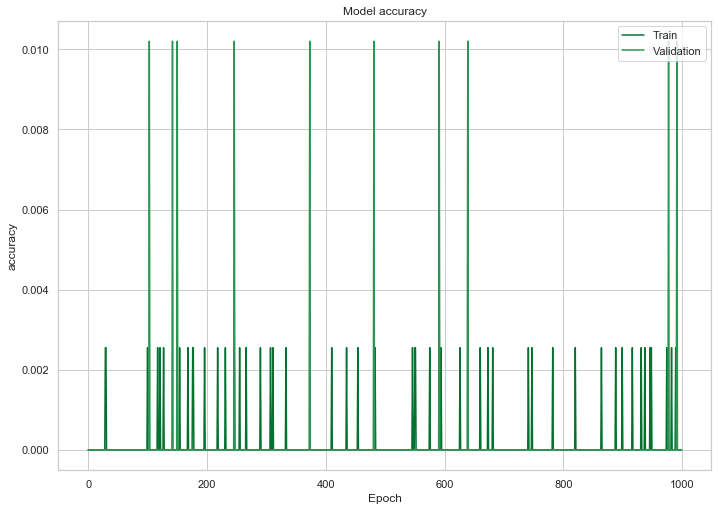

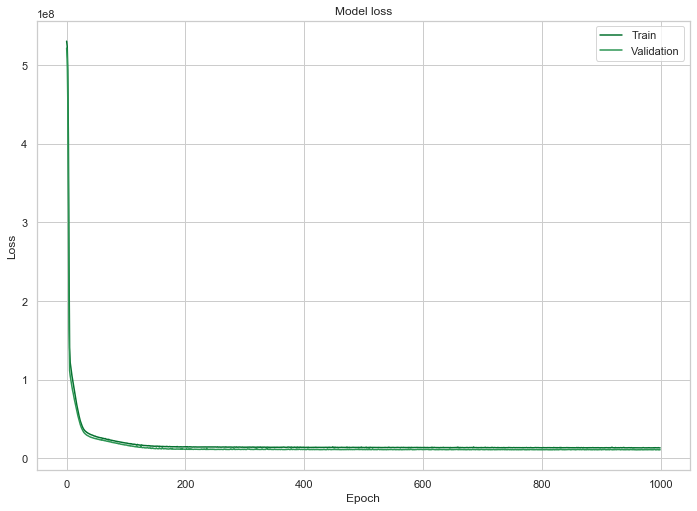

In [52]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

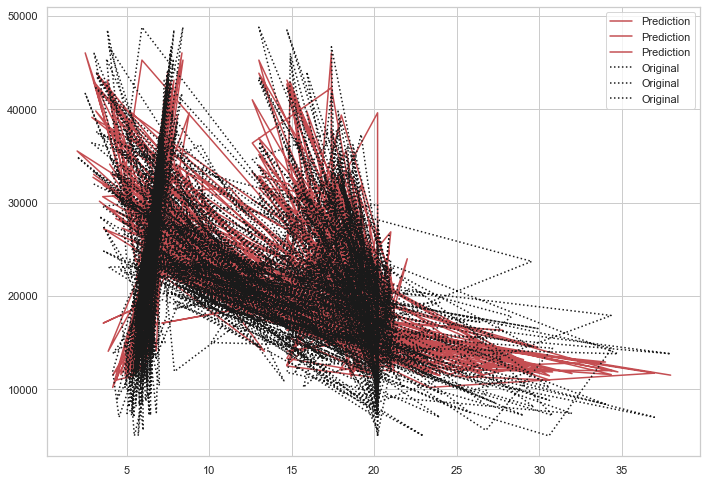

In [53]:

# Run each x value through the neural network.
p = m.predict(X_train)

# Plot the values.
plt.plot(X_train, p, 'r-', label='Prediction')
plt.plot(X_train, y_train, 'k:', label='Original')
plt.legend()

In [43]:
# Create a new neural network.
m = kr.models.Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers

# input dim = number of inputs
m.add(kr.layers.Dense(32, activation='relu', input_shape=(n_cols,)))
m.add(kr.layers.Dense(64, activation="relu"))
m.add(kr.layers.Dense(10, activation="relu"))
#how many outputs?
m.add(kr.layers.Dense(1, activation='sigmoid'))


#compile model using mse as a measure of model performance
#m.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['accuracy'])
m.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
# Train the model.

hist = m.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=500, batch_size=10, verbose=1)

score = m.evaluate(X_test, y_test, verbose = 0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
print(m.summary())

Train on 392 samples, validate on 98 samples
Epoch 1/500
392/392 [==============================] - 1s 2ms/step - loss: 531240976.4898 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 2/500
392/392 [==============================] - 0s 289us/step - loss: 531240964.7347 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 3/500
392/392 [==============================] - 0s 289us/step - loss: 531240966.2041 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 4/500
392/392 [==============================] - 0s 295us/step - loss: 531240963.1837 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 5/500
392/392 [==============================] - 0s 294us/step - loss: 531240967.7551 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 6/500
392/392 [==============================] - 0s 285us/step - loss: 531240961.4694 - accuracy: 0.0000e+

Epoch 49/500
392/392 [==============================] - 0s 276us/step - loss: 531240967.1837 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 50/500
392/392 [==============================] - 0s 276us/step - loss: 531240966.2041 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 51/500
392/392 [==============================] - 0s 279us/step - loss: 531240976.9796 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 52/500
392/392 [==============================] - 0s 279us/step - loss: 531240969.3061 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 53/500
392/392 [==============================] - 0s 279us/step - loss: 531240963.2653 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 54/500
392/392 [==============================] - 0s 273us/step - loss: 531240970.4490 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_a

392/392 [==============================] - 0s 291us/step - loss: 531240963.2653 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 98/500
392/392 [==============================] - 0s 284us/step - loss: 531240967.0204 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 99/500
392/392 [==============================] - 0s 292us/step - loss: 531240970.1224 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 100/500
392/392 [==============================] - 0s 294us/step - loss: 531240970.2857 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 101/500
392/392 [==============================] - 0s 291us/step - loss: 531240971.2653 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 102/500
392/392 [==============================] - 0s 287us/step - loss: 531240968.0000 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0

392/392 [==============================] - 0s 296us/step - loss: 531240972.7347 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 146/500
392/392 [==============================] - 0s 299us/step - loss: 531240967.4694 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 147/500
392/392 [==============================] - 0s 298us/step - loss: 531240970.4490 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 148/500
392/392 [==============================] - 0s 295us/step - loss: 531240966.8571 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 149/500
392/392 [==============================] - 0s 282us/step - loss: 531240972.2449 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 150/500
392/392 [==============================] - 0s 276us/step - loss: 531240968.3265 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy:

Epoch 193/500
392/392 [==============================] - 0s 280us/step - loss: 531240972.2449 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 194/500
392/392 [==============================] - 0s 288us/step - loss: 531240971.2653 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 195/500
392/392 [==============================] - 0s 283us/step - loss: 531240960.4898 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 196/500
392/392 [==============================] - 0s 286us/step - loss: 531240968.9796 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 197/500
392/392 [==============================] - 0s 327us/step - loss: 531240975.3469 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 198/500
392/392 [==============================] - 0s 315us/step - loss: 531240965.3878 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 -

Epoch 241/500
392/392 [==============================] - 0s 283us/step - loss: 531240968.0816 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 242/500
392/392 [==============================] - 0s 277us/step - loss: 531240958.5306 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 243/500
392/392 [==============================] - 0s 275us/step - loss: 531240973.0612 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 244/500
392/392 [==============================] - 0s 284us/step - loss: 531240969.3061 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 245/500
392/392 [==============================] - 0s 276us/step - loss: 531240971.4286 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 246/500
392/392 [==============================] - 0s 293us/step - loss: 531240970.7755 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 -

Epoch 289/500
392/392 [==============================] - 0s 279us/step - loss: 531240968.9796 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 290/500
392/392 [==============================] - 0s 277us/step - loss: 531240968.8163 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 291/500
392/392 [==============================] - 0s 276us/step - loss: 531240963.7551 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 292/500
392/392 [==============================] - 0s 269us/step - loss: 531240968.0000 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 293/500
392/392 [==============================] - 0s 275us/step - loss: 531240970.1224 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 294/500
392/392 [==============================] - 0s 269us/step - loss: 531240969.3061 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 -

Epoch 337/500
392/392 [==============================] - 0s 272us/step - loss: 531240968.0000 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 338/500
392/392 [==============================] - 0s 272us/step - loss: 531240969.3061 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 339/500
392/392 [==============================] - 0s 272us/step - loss: 531240974.6939 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 340/500
392/392 [==============================] - 0s 276us/step - loss: 531240975.6735 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 341/500
392/392 [==============================] - 0s 268us/step - loss: 531240968.0000 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 342/500
392/392 [==============================] - 0s 276us/step - loss: 531240968.8163 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 -

Epoch 385/500
392/392 [==============================] - 0s 278us/step - loss: 531240962.4490 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 386/500
392/392 [==============================] - 0s 293us/step - loss: 531240966.2041 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 387/500
392/392 [==============================] - 0s 287us/step - loss: 531240961.5510 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 388/500
392/392 [==============================] - 0s 281us/step - loss: 531240973.4694 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 389/500
392/392 [==============================] - 0s 286us/step - loss: 531240970.6122 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 390/500
392/392 [==============================] - 0s 288us/step - loss: 531240973.2245 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 -

Epoch 433/500
392/392 [==============================] - 0s 280us/step - loss: 531240971.7551 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 434/500
392/392 [==============================] - 0s 282us/step - loss: 531240968.0000 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 435/500
392/392 [==============================] - 0s 289us/step - loss: 531240964.1633 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 436/500
392/392 [==============================] - 0s 287us/step - loss: 531240971.4286 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 437/500
392/392 [==============================] - 0s 275us/step - loss: 531240973.2245 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 438/500
392/392 [==============================] - 0s 285us/step - loss: 531240969.3061 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 -

Epoch 481/500
392/392 [==============================] - 0s 301us/step - loss: 531240969.1429 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 482/500
392/392 [==============================] - 0s 281us/step - loss: 531240971.0204 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 483/500
392/392 [==============================] - 0s 276us/step - loss: 531240980.0816 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 484/500
392/392 [==============================] - 0s 282us/step - loss: 531240978.6122 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 485/500
392/392 [==============================] - 0s 281us/step - loss: 531240973.3878 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 - val_accuracy: 0.0000e+00
Epoch 486/500
392/392 [==============================] - 0s 285us/step - loss: 531240971.0204 - accuracy: 0.0000e+00 - val_loss: 524068160.6531 -

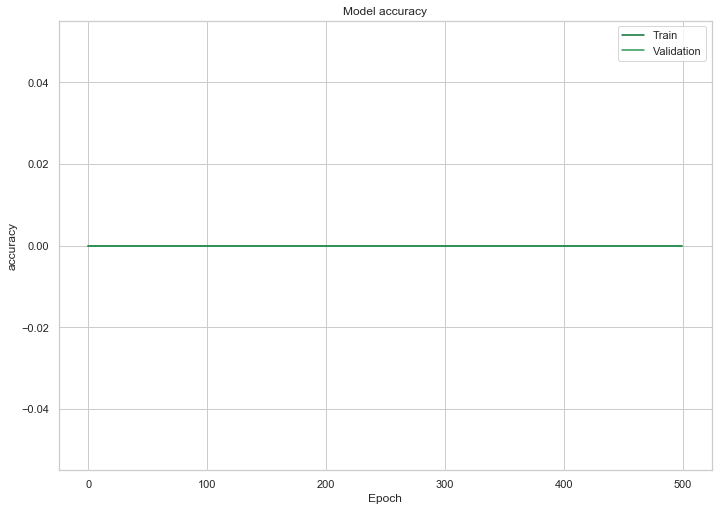

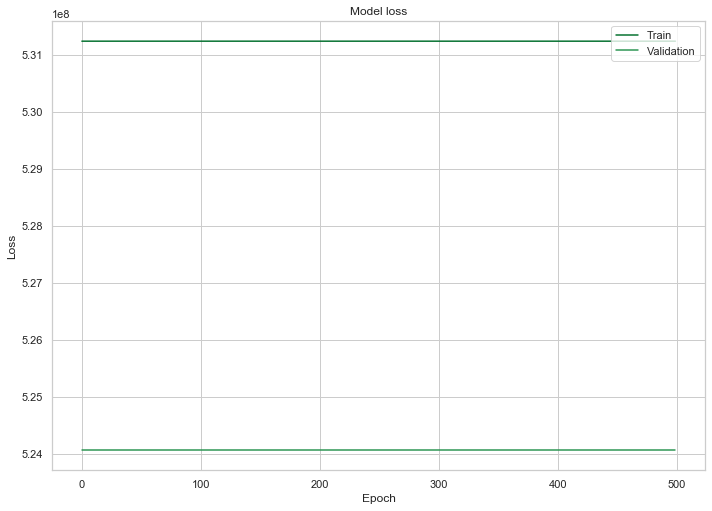

In [44]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

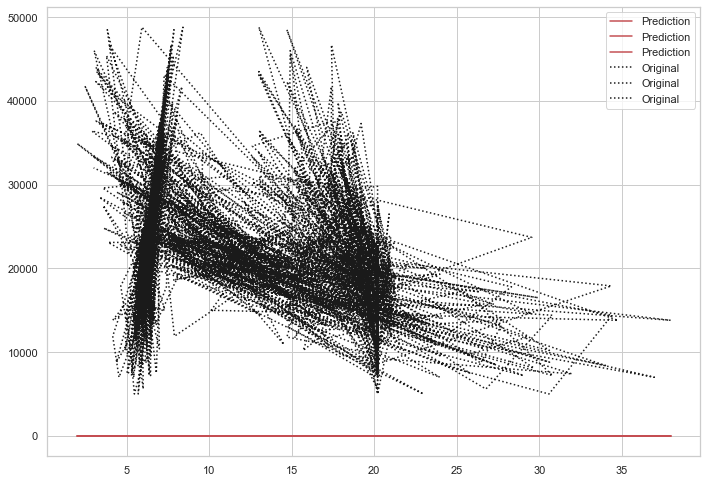

In [45]:

# Run each x value through the neural network.
p = m.predict(X_train)

# Plot the values.
plt.plot(X_train, p, 'r-', label='Prediction')
plt.plot(X_train, y_train, 'k:', label='Original')
plt.legend()

### Ref:
https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

### inferential statistics
https://www.datavedas.com/inferential-statistics-in-python/
https://en.wikipedia.org/wiki/P-value

## Correlation
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

https://rpubs.com/joelrudinas03/BostonHousingPrices

https://realpython.com/linear-regression-in-python/

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
x = boston['MEDV']
y = boston['LSTAT']

In [ ]:
model = LinearRegression()


In [ ]:
model.fit(x, y)

In [ ]:
# Plot the line and the points.
plt.plot(x, y, 'k.')